# **Facebook**

# Install dan Import Library

In [3]:
!pip uninstall community
!pip install python-louvain

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.12/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.12/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.12/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.12/dist-packages/community/community_status.py
Proceed (Y/n)? y
  Successfully uninstalled community-1.0.0b1


In [4]:
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import networkx as nx

file = "/content/drive/MyDrive/PPW/UAS/FB/facebook_combined.txt.gz"

G_fb = nx.read_edgelist(file, nodetype=int)

print("Nodes :", G_fb.number_of_nodes())
print("Edges :", G_fb.number_of_edges())


Nodes : 4039
Edges : 88234


#Algoritma Louvain

In [10]:
print("\nRunning Louvain algorithm...")
hasil = community_louvain.best_partition(G_fb)
jumlah_komunitas = len(set(hasil.values()))
print("Total Communities Detected:", jumlah_komunitas)


Running Louvain algorithm...
Total Communities Detected: 16


In [11]:
print("\nRunning Louvain algorithm...")

hasil = community_louvain.best_partition(G_fb)

jumlah_komunitas = len(set(hasil.values()))
print("Total Communities Detected:", jumlah_komunitas)



Running Louvain algorithm...
Total Communities Detected: 16


#Mengitung Modularity

In [12]:
from community.community_louvain import modularity

nilai_modularity = modularity(hasil, G_fb)
print("\nModularity Score :", nilai_modularity)


Modularity Score : 0.8349315626306786


#Menyimpan Hasil csv

In [13]:
# 3. Save Results

df = pd.DataFrame({
    "node": list(hasil.keys()),
    "community": list(hasil.values())
})

df.to_csv("/content/drive/MyDrive/PPW/UAS/FB/facebook_louvain_result.csv", index=False)
print("\nHasil komunitas disimpan ke: facebook_louvain_result.csv")


Hasil komunitas disimpan ke: facebook_louvain_result.csv


In [14]:
fb_louvain_result = pd.read_csv("/content/drive/MyDrive/PPW/UAS/FB/facebook_louvain_result.csv")
fb_louvain_result

,node,community
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
4034,4034,12
4035,4035,12
4036,4036,12
4037,4037,12


#Visualisasi graph

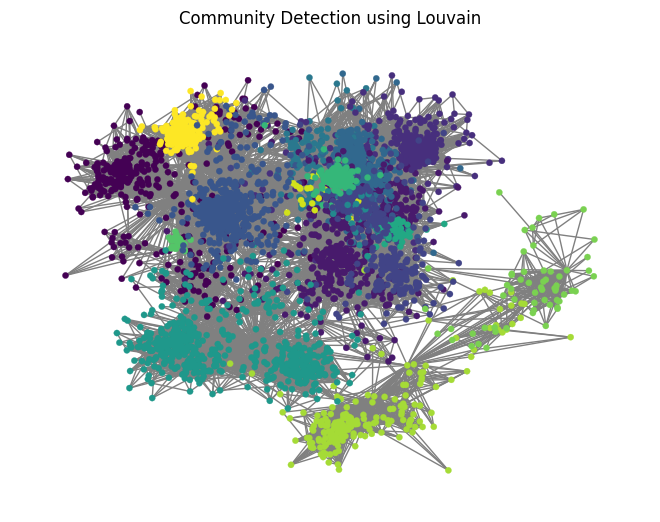

In [17]:
# 4. (Optional) Visualisasi
visualize = True

if visualize:
    pos = nx.spring_layout(G_fb, seed=42)

    nx.draw(
        G_fb,
        pos,
        node_size=20,
        node_color=[hasil[n] for n in G_fb.nodes()],
        cmap=plt.get_cmap("viridis"),
        edge_color="gray",
        linewidths=0.2
    )

    plt.title("Community Detection using Louvain")
    plt.show()


1. temukan komunitas

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import display

# 1) Load hasil Louvain
path = "/content/drive/MyDrive/PPW/UAS/FB/facebook_louvain_result.csv"
df = pd.read_csv(path)

# 2) Hitung ukuran komunitas
community_sizes = Counter(df["community"])

# 3) Buat DataFrame statistik
stats_df = pd.DataFrame({
    "Community ID": list(community_sizes.keys()),
    "Size": list(community_sizes.values())
}).sort_values(by="Size", ascending=False).reset_index(drop=True)

# 4) Statistik ringkasan
total_nodes       = len(df)
total_communities = len(community_sizes)
largest           = stats_df.iloc[0].to_dict()
smallest          = stats_df.iloc[-1].to_dict()
avg_size          = stats_df["Size"].mean()
median_size       = stats_df["Size"].median()
std_size          = stats_df["Size"].std()

summary = {
    "Total Nodes": int(total_nodes),
    "Total Communities": int(total_communities),
    "Largest Community": largest,
    "Smallest Community": smallest,
    "Average Size": float(round(avg_size, 4)),
    "Median Size": float(median_size),
    "Std Dev Size": float(round(std_size, 4))
}

# 5) Tampilkan tabel & ringkasan
print("=== Community Statistics Summary ===")
for k, v in summary.items():
    print(f"{k}: {v}")
print("\n=== Table: community sizes (sorted desc) ===")
display(stats_df)




=== Community Statistics Summary ===
Total Nodes: 4039
Total Communities: 16
Largest Community: {'Community ID': 8, 'Size': 548}
Smallest Community: {'Community ID': 7, 'Size': 19}
Average Size: 252.4375
Median Size: 231.5
Std Dev Size: 188.4792

=== Table: community sizes (sorted desc) ===


,Community ID,Size
0,8,548
1,4,535
2,2,443
3,1,436
4,3,423
5,0,350
6,5,324
7,10,237
8,15,226
9,13,206


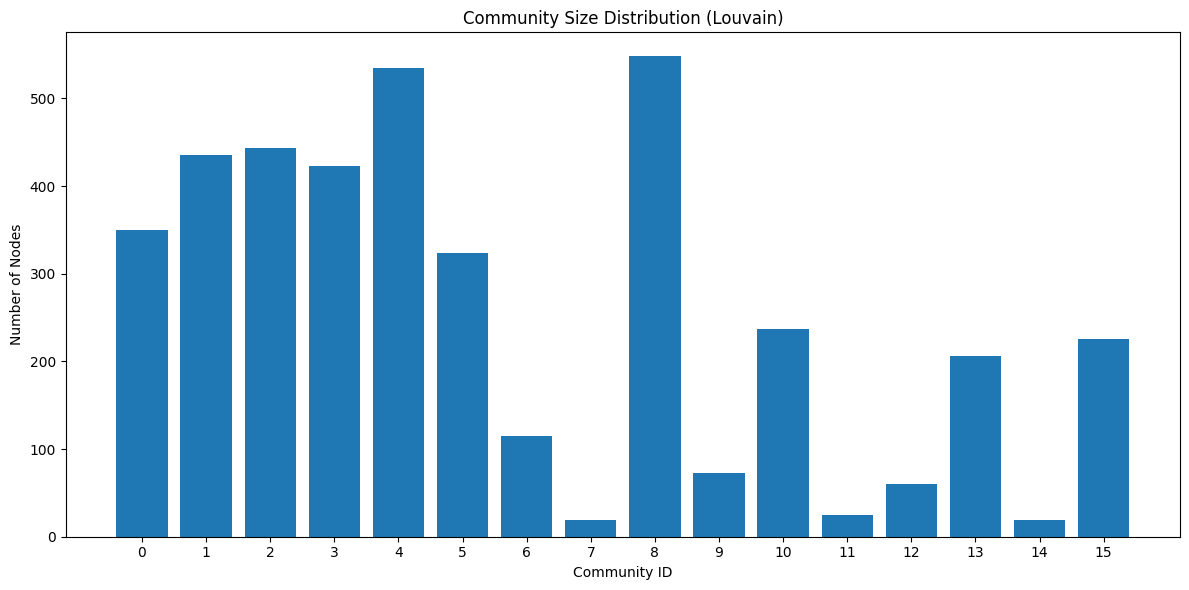

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the uploaded file
path = "/content/drive/MyDrive/PPW/UAS/FB/facebook_louvain_result.csv"
df = pd.read_csv(path)

# Count community sizes
community_sizes = Counter(df['community'])

# Prepare data
communities = list(community_sizes.keys())
sizes = list(community_sizes.values())

# Plot
plt.figure(figsize=(12, 6))
plt.bar(communities, sizes)
plt.xlabel("Community ID")
plt.ylabel("Number of Nodes")
plt.title("Community Size Distribution (Louvain)")
plt.xticks(communities)
plt.tight_layout()
plt.show()


2. keluarkan anggota setiap komunitas

In [26]:
community_groups = {}

for index, row in df.iterrows():
    community_groups.setdefault(row["community"], []).append(row["node"])

# tampilkan anggota komunitas
for cid, members in community_groups.items():
    print(f"\nKomunitas {cid} | Jumlah anggota: {len(members)}")
    print(members)



Komunitas 0 | Jumlah anggota: 350
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64

3. -+ anggota komunitas

In [27]:
largest_comm = max(community_groups, key=lambda c: len(community_groups[c]))
smallest_comm = min(community_groups, key=lambda c: len(community_groups[c]))

print("\nKomunitas terbesar:", largest_comm, "| anggota:", len(community_groups[largest_comm]))
print("Komunitas terkecil:", smallest_comm, "| anggota:", len(community_groups[smallest_comm]))



Komunitas terbesar: 8 | anggota: 548
Komunitas terkecil: 14 | anggota: 19


4. gmbr ulang graph dari komunitas yang paling banyak

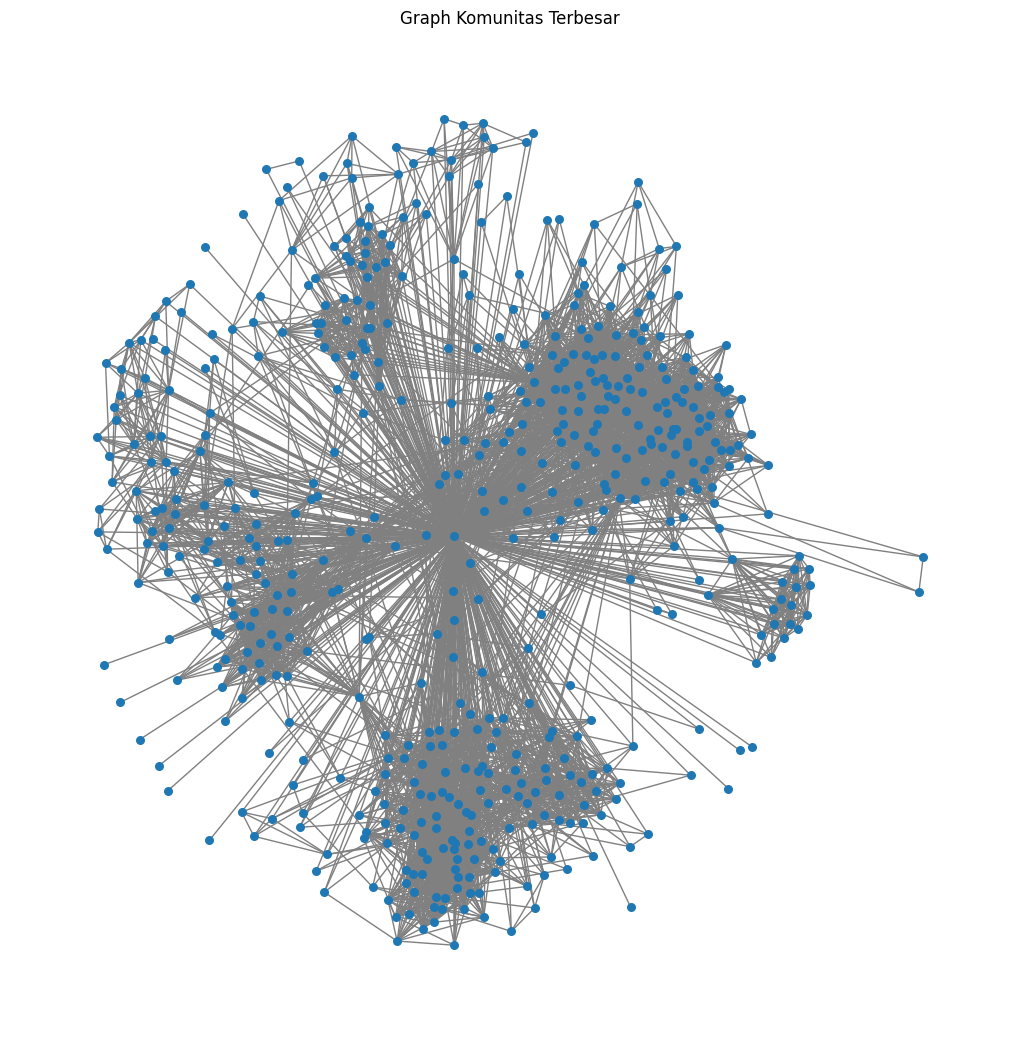

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Load full graph
file_path = "/content/drive/MyDrive/PPW/UAS/FB/facebook_combined.txt.gz"
G = nx.read_edgelist(file_path, nodetype=int)

# Ambil komunitas terbesar
largest_nodes = community_groups[largest_comm]

# Buat subgraph
subG = G.subgraph(largest_nodes)

plt.figure(figsize=(10, 10))
nx.draw(subG, node_size=30, edge_color='gray')
plt.title("Graph Komunitas Terbesar")
plt.show()


5. deteksi komunitas dari komunitas terbesar itu

In [30]:
sub_partition = community_louvain.best_partition(subG)
print("\nKomunitas dalam komunitas terbesar berhasil ditemukan!")
print("Total sub-komunitas:", len(set(sub_partition.values())))



Komunitas dalam komunitas terbesar berhasil ditemukan!
Total sub-komunitas: 9


6. keluarkan komunitas didalam komunitas

In [31]:
sub_groups = defaultdict(list)
for node, comm in sub_partition.items():
    sub_groups[comm].append(node)

for sub_id, members in sub_groups.items():
    print(f"Sub-Komunitas {sub_id} | Jumlah anggota = {len(members)}")
sorted_sub = sorted(sub_groups.items(), key=lambda x: len(x[1]), reverse=True)
print("\n=== Sub-komunitas terbesar ===")
for sid, mem in sorted_sub:
    print(f"Sub-Kom {sid} : {len(mem)} anggota")


Sub-Komunitas 6 | Jumlah anggota = 93
Sub-Komunitas 1 | Jumlah anggota = 110
Sub-Komunitas 2 | Jumlah anggota = 42
Sub-Komunitas 4 | Jumlah anggota = 52
Sub-Komunitas 0 | Jumlah anggota = 132
Sub-Komunitas 7 | Jumlah anggota = 19
Sub-Komunitas 8 | Jumlah anggota = 64
Sub-Komunitas 3 | Jumlah anggota = 22
Sub-Komunitas 5 | Jumlah anggota = 14

=== Sub-komunitas terbesar ===
Sub-Kom 0 : 132 anggota
Sub-Kom 1 : 110 anggota
Sub-Kom 6 : 93 anggota
Sub-Kom 8 : 64 anggota
Sub-Kom 4 : 52 anggota
Sub-Kom 2 : 42 anggota
Sub-Kom 3 : 22 anggota
Sub-Kom 7 : 19 anggota
Sub-Kom 5 : 14 anggota
